In [2]:
import os
from datetime import datetime as dt 
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import duckdb
import matplotlib.dates as mdates
import statsmodels.api as sm



In [92]:
current_path = os.getcwd()
data = pd.read_csv(current_path + \
"/dataset.csv")
data2 = pd.read_csv(current_path + "/songs_normalize.csv")
data3 = pd.read_csv(current_path + "/spotify-2010-2019.csv")

In [93]:
data3 = data3.iloc[:-3]

In [94]:
data3['year released'] = data3['year released'].astype(int)
data3['top year'] = data3['top year'].astype(int)

In [122]:
genre_mapping = {
    'pop': [
        'pop', 'pop soul', 'bedroom pop', 'colombian pop', 'acoustic pop', 'indie pop', 'art pop', 'baroque pop', 
        'austrian pop', 'irish pop', 'french indie pop', 'german pop', 'canadian pop', 'danish pop', 'social media pop',
        'bubblegum dance', 'candy pop', 'barbadian pop', 'israeli pop', 'belgian pop', 'australian pop', 
    ],
    'hip hop': [
        'hip hop', 'atl hip hop', 'detroit hip hop', 'asian american hip hop', 'east coast hip hop', 'canadian hip hop', 
        'uk hip hop', 'conscious hip hop', 'gangster rap', 'australian hip hop', 'new jersey rap', 'ghanaian hip hop', 
        'melodic rap', 'chicago rap', 'london rap', 'florida rap', 'emo rap', 'kentucky hip hop', 'dfw rap', 
        'hawaiian hip hop', 'dirty south rap', 'memphis hip hop', 'north carolina hip hop', 'nyc rap', 'uk drill', 
        'lgbtq+ hip hop', 'dutch hip hop','argentine hip hop','ohio hip hop'
    ],
    'rock': [
        'modern alternative rock', 'indie rock', 'garage rock', 'alternative rock', 'classic rock', 'celtic rock',
        'alternative metal', 'modern rock'
    ],
    'r&b': ['alternative r&b', 'contemporary r&b', 'neo soul', 'canadian contemporary r&b'],
    'electronic': [
        'edm', 'big room', 'disco house', 'romanian house', 'deep house', 'bass trap', 'electro', 'deep disco house', 'bubblegum dance',
        'electropop', 'destroy techno', 'complextro', 'electro house','house'
    ],
    'rap': ['rap', 'comedy rap', 'cali rap', 'social media pop', 'alt z'],
    'indie': [
        'indietronica', 'aussietronica', 'icelandic indie', 'canadian indie', 'indie folk', 'eau claire indie', 'indie poptimism', 
        'indie pop rap', 'australian indie', 'la indie', 'new french touch'
    ],
    'dance': [
        'dance pop', 'modern folk rock', 'dancefloor dnb', 'alternative dance', 'downtempo', 'tropical house', 'chill pop'
    ],
    'folk': ['neo mellow', 'folk-pop', 'modern folk rock'],
    'house': ['deep groove house', 'dutch house', 'tropical house'],
    'soul': ['british soul', 'pop soul'],
    'country': ['contemporary country', 'boy band'],
    'latin': ['latin'],
    'grime': ['grime', 'afroswing'],
    'afrofuturism': ['afrofuturism', 'afro dancehall'],
    'dark clubbing': ['dark clubbing'],
    'reggae fusion': ['reggae fusion'],
    'comic': ['comic'],
    'black americana': ['black americana'],
    'idol': ['idol'],
    'talent show': ['talent show'],
    'hollywood': ['hollywood']
}

In [123]:
def replace_genres(genre, mapping):
    for key, values in mapping.items():
        if genre in values:
            return key
    return genre  


data3['top genre'] = data3['top genre'].apply(lambda x: replace_genres(x, genre_mapping))



In [124]:
data3['top genre'].unique()

array(['dance', 'pop', 'hip hop', 'pop rap', 'electronic', 'lilith',
       'folk', 'reggae fusion', 'idol', 'talent show', 'rock', 'indie',
       'grime', 'country', 'australian dance', 'soul', 'permanent wave',
       'hip pop', 'g funk', 'french shoegaze', 'r&b', 'k-pop', 'brostep',
       'metropopolis', 'emo', 'adult standards', 'comic',
       'irish singer-songwriter', 'san diego rap', 'australian psych',
       'rap', 'latin', 'basshall', 'hollywood', 'afrofuturism',
       'black americana', 'alternative pop rock', 'dark clubbing'],
      dtype=object)

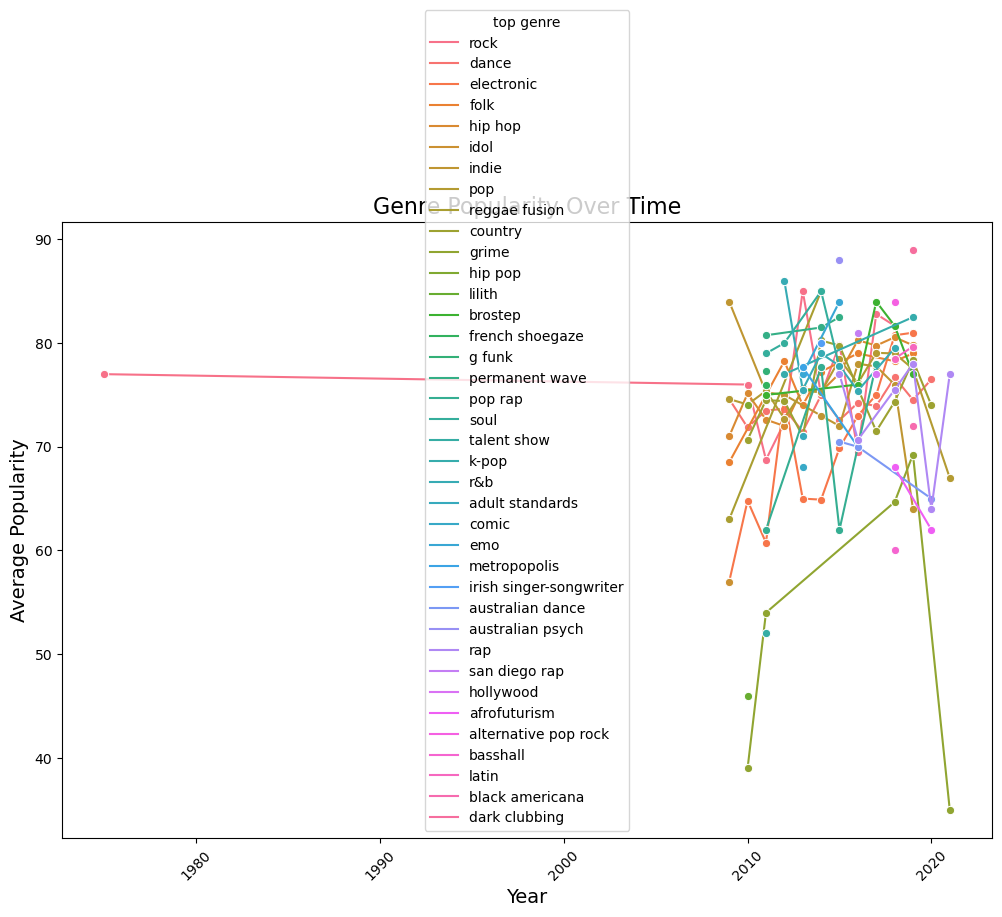

In [125]:
genre_popularity_over_time = data3.groupby(['year released', 'top genre'])['pop'].mean().reset_index()

# Set the figure size for better readability
plt.figure(figsize=(12, 8))

# Plot using seaborn to visualize popularity over time for each genre
sns.lineplot(x='year released', y='pop', hue='top genre', data=genre_popularity_over_time, marker='o')

# Adding title and labels
plt.title('Genre Popularity Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Popularity', fontsize=14)

# Show the plot
plt.xticks(rotation=45)
plt.show()





In [126]:
print(data3['top genre'].unique())

['dance' 'pop' 'hip hop' 'pop rap' 'electronic' 'lilith' 'folk'
 'reggae fusion' 'idol' 'talent show' 'rock' 'indie' 'grime' 'country'
 'australian dance' 'soul' 'permanent wave' 'hip pop' 'g funk'
 'french shoegaze' 'r&b' 'k-pop' 'brostep' 'metropopolis' 'emo'
 'adult standards' 'comic' 'irish singer-songwriter' 'san diego rap'
 'australian psych' 'rap' 'latin' 'basshall' 'hollywood' 'afrofuturism'
 'black americana' 'alternative pop rock' 'dark clubbing']


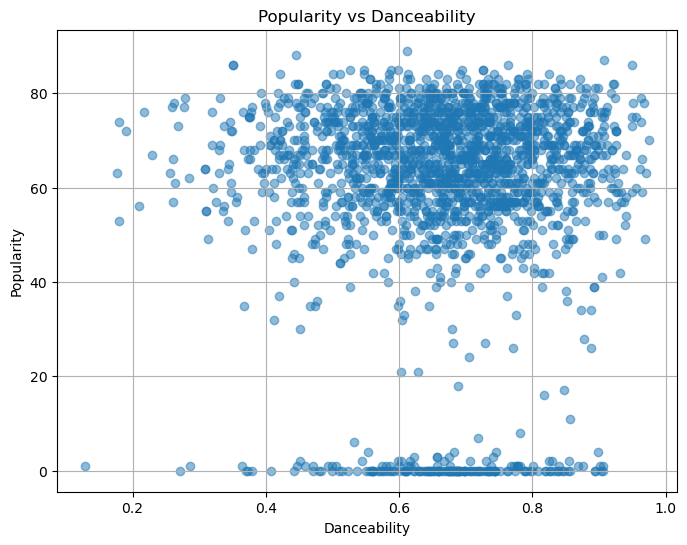

In [52]:
plt.figure(figsize=(8,6))
plt.scatter(data2['danceability'], data2['popularity'], alpha=0.5)
plt.title('Popularity vs Danceability')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

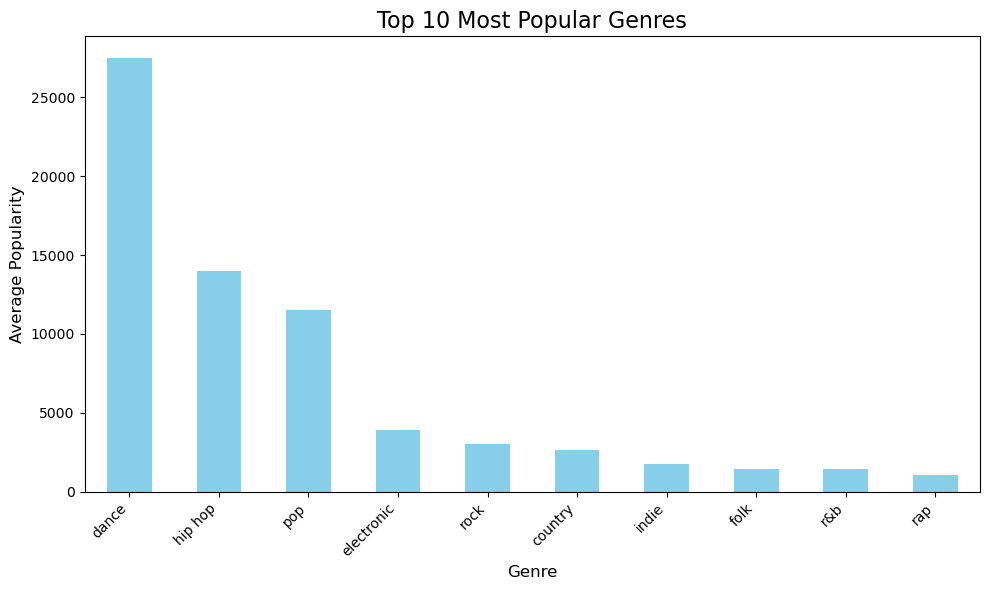

In [127]:

# Assuming 'data' is your DataFrame
# Group by 'track_genre' and calculate the mean popularity for each genre
genre_popularity = data3.groupby('top genre')['pop'].sum().sort_values(ascending=False)

# Plot the top 10 most popular genres
plt.figure(figsize=(10, 6))
genre_popularity.head(10).plot(kind='bar', color='skyblue')

# Add labels and title
plt.title('Top 10 Most Popular Genres', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average Popularity', fontsize=12)

# Rotate the x labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

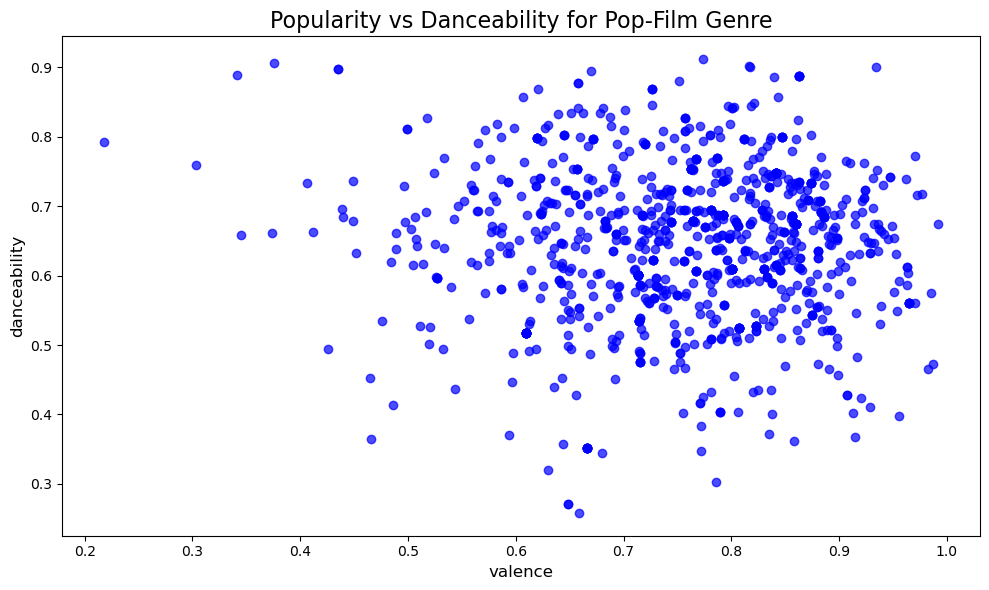

In [49]:
pop_film_data = data[data['track_genre'] == 'edm']

# Create a scatter plot for popularity vs. danceability
plt.figure(figsize=(10, 6))
plt.scatter(pop_film_data['energy'], pop_film_data['danceability'],alpha=0.7, color='blue')

# Add labels and title
plt.title('Popularity vs Danceability for Pop-Film Genre', fontsize=16)
plt.xlabel('valence', fontsize=12)
plt.ylabel('danceability', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [29]:
print(data['track_genre'].unique())

['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime'
 'black-metal' 'bluegrass' 'blues' 'brazil' 'breakbeat' 'british'
 'cantopop' 'chicago-house' 'children' 'chill' 'classical' 'club' 'comedy'
 'country' 'dance' 'dancehall' 'death-metal' 'deep-house' 'detroit-techno'
 'disco' 'disney' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro'
 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german'
 'gospel' 'goth' 'grindcore' 'groove' 'grunge' 'guitar' 'happy'
 'hard-rock' 'hardcore' 'hardstyle' 'heavy-metal' 'hip-hop' 'honky-tonk'
 'house' 'idm' 'indian' 'indie-pop' 'indie' 'industrial' 'iranian'
 'j-dance' 'j-idol' 'j-pop' 'j-rock' 'jazz' 'k-pop' 'kids' 'latin'
 'latino' 'malay' 'mandopop' 'metal' 'metalcore' 'minimal-techno' 'mpb'
 'new-age' 'opera' 'pagode' 'party' 'piano' 'pop-film' 'pop' 'power-pop'
 'progressive-house' 'psych-rock' 'punk-rock' 'punk' 'r-n-b' 'reggae'
 'reggaeton' 'rock-n-roll' 'rock' 'rockabilly' 'romance' 'sad' 'salsa'
 'samba' 'sertanejo' 'show

In [32]:
genre_counts = data['track_genre'].value_counts()

# Print the counts
print(genre_counts)

track_genre
acoustic             1000
punk-rock            1000
progressive-house    1000
power-pop            1000
pop                  1000
                     ... 
folk                 1000
emo                  1000
electronic           1000
electro              1000
world-music          1000
Name: count, Length: 114, dtype: int64


In [42]:
data['popularity'].mode()

0    0
Name: popularity, dtype: int64

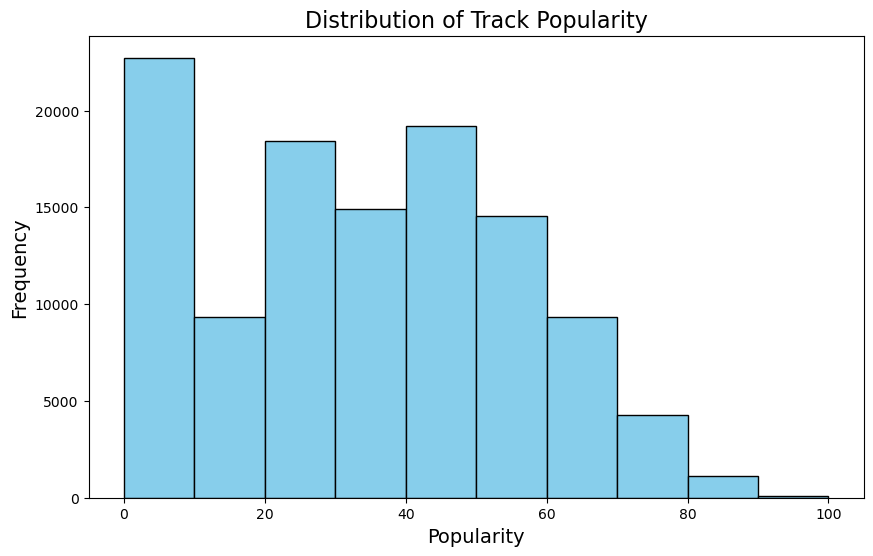

In [46]:
# Assuming 'data' is your DataFrame containing the 'popularity' column
# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(data['popularity'], bins=10, color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Distribution of Track Popularity', fontsize=16)
plt.xlabel('Popularity', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()

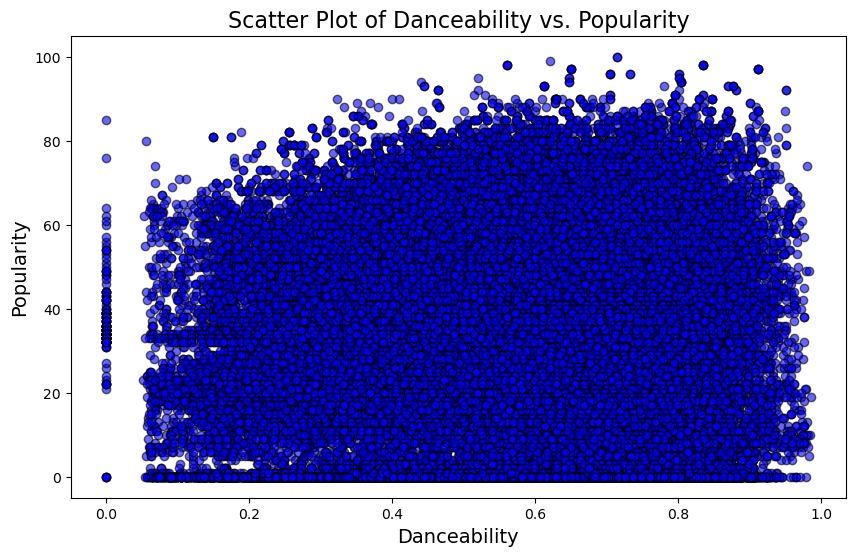

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(data['danceability'], data['popularity'], alpha=0.6, c='blue', edgecolors='black')

# Add labels and title
plt.title('Scatter Plot of Danceability vs. Popularity', fontsize=16)
plt.xlabel('Danceability', fontsize=14)
plt.ylabel('Popularity', fontsize=14)

# Show the plot
plt.show()


Count of tracks with popularity = 0: 16020
